In [1]:
import pickle as pkl
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
from itertools import product

In [2]:
#Load the data
results = []
#Change this to wherever you have the data
PATH = "../Data/results/"
for filen in glob(PATH + "**/*.pkl",recursive=True):
    #Ignore the config files
    if filen[-10:]!='config.pkl':
        with open(filen, 'rb') as file:
            results.append(pkl.load(file))

In [3]:
print(len(results))
results[0]

52


{'continue': [2.539999999999999,
  2.75,
  0.9200000000000017,
  2.539999999999999,
  1.9399999999999977,
  2.6199999999999974,
  3.280000000000001,
  0.6899999999999977,
  1.259999999999998,
  3.039999999999999,
  3.3900000000000006,
  2.4299999999999997,
  1.8699999999999974,
  3.3900000000000006,
  3.3900000000000006,
  1.9500000000000028,
  2.759999999999998,
  0.7000000000000028,
  2.039999999999999,
  3.3900000000000006,
  1.5600000000000023,
  1.3299999999999983,
  1.1700000000000017,
  3.3900000000000006,
  2.240000000000002],
 'random': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'cont_deriv_fit': [(0.005547792007220664, 3.256037708276807),
  (0.0017055721791052747, 2.073619512172928),
  (0.008815914989924067, 2.3445736617496777),
  (0.007294651736003743, 1.7788688797839427),
  (0.0006925508898447674, 1.3000391891473555),
  (0.0018055009100805819,

In [4]:
#Split the data by system

results_split = {item:[] for item in {'lorenz', 'thomas', 'rossler', 'softrobot'}}
for item in results:
    results_split[item['experiment'][0]].append(item)

for name in results_split:
    print(f"{name}: {len(results_split[name])} items")

softrobot: 12 items
lorenz: 13 items
thomas: 15 items
rossler: 12 items


In [5]:
#Determine which experiments are missing
SYSTEM = ["lorenz", "rossler", "thomas", "softrobot"]
MAP_INITIAL = ["random", "activ_f", "relax"]
PREDICTION_TYPE = ["continue", "random"]
METHOD = ["standard", "augmented"]
all_exps = {item for item in product(SYSTEM, MAP_INITIAL, PREDICTION_TYPE, METHOD)}
ran_exps = {item['experiment'] for item in results}
missing = all_exps.difference(ran_exps)
if len(missing)==0:
    print("No experiments missing.")
else:
    print("Missing experiments:")
    for item in missing:
        print(item)

No experiments missing.


# Analysis - boxplots

In [6]:
def boxplots(data_list, which, loc='upper left', sort=True):
    names = np.array([' '.join(item['experiment'][1:]) for item in data_list])
    data = [item[which] for item in data_list]
    firstlen = len(data[0])
    same_len = np.all([firstlen == len(item) for item in data])
    if same_len:
        data_array = np.array(data)
        if sort:
            means = np.median(data_array,axis=1)
            order = np.argsort(means).astype(int)
        else:
            order = np.arange(data_array.shape[0]).astype(int)
        plt.boxplot(data_array[order,:].T, labels=names[order], vert=False)
    else:
        if sort:
            means = [np.median(item) for item in data]
            order = np.argsort(means).astype(int)
            data = [data[i] for i in order]
            names = [names[i] for i in order]
            
        plt.boxplot(data, labels=names, vert=False)

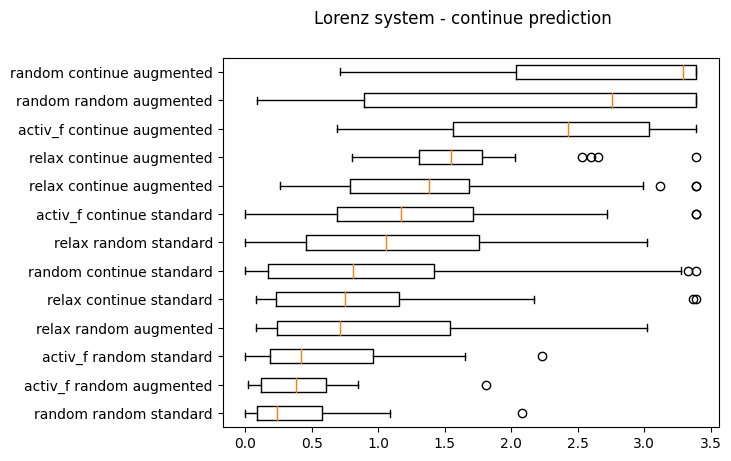

In [7]:
boxplots(results_split['lorenz'], 'continue')
plt.suptitle('Lorenz system - continue prediction')
plt.show()

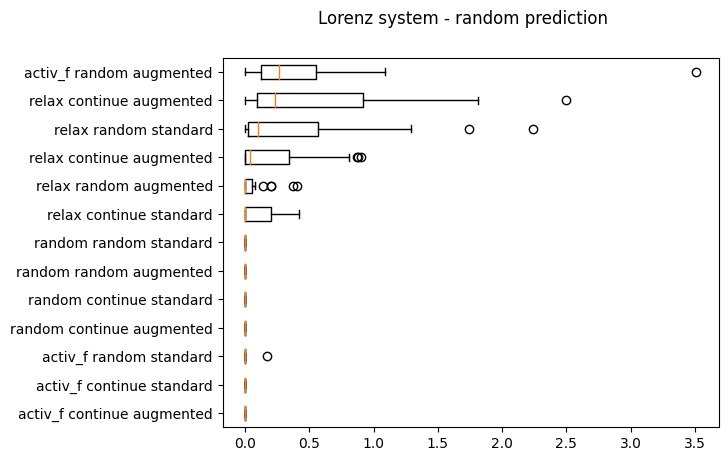

In [8]:
boxplots(results_split['lorenz'], 'random')
plt.suptitle('Lorenz system - random prediction')
plt.show()

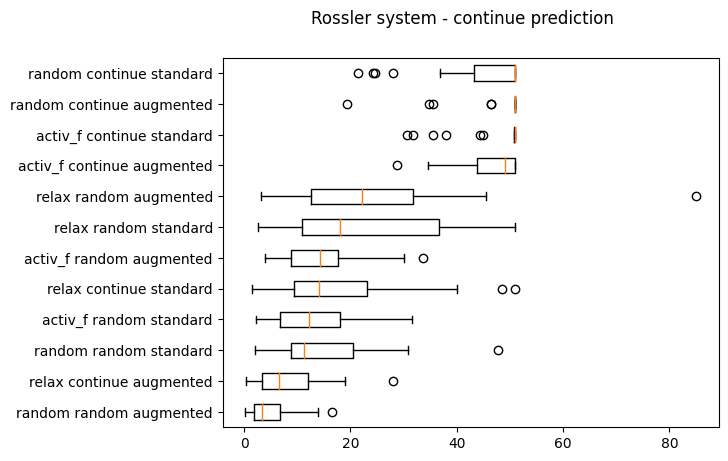

In [9]:
boxplots(results_split['rossler'], 'continue')
plt.suptitle('Rossler system - continue prediction')
plt.show()

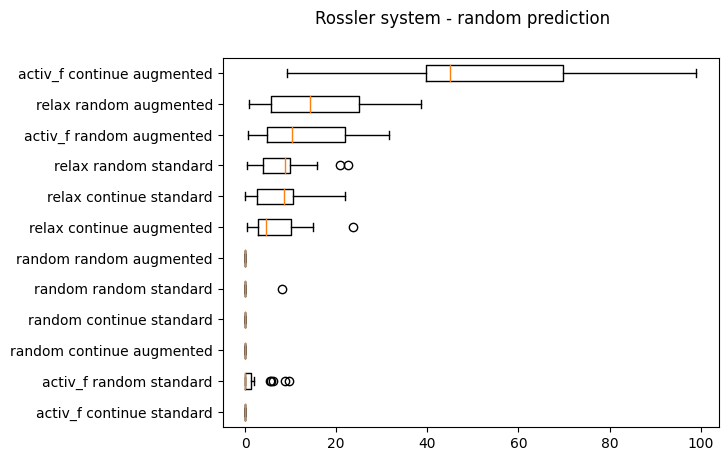

In [10]:
boxplots(results_split['rossler'], 'random')
plt.suptitle('Rossler system - random prediction')
plt.show()

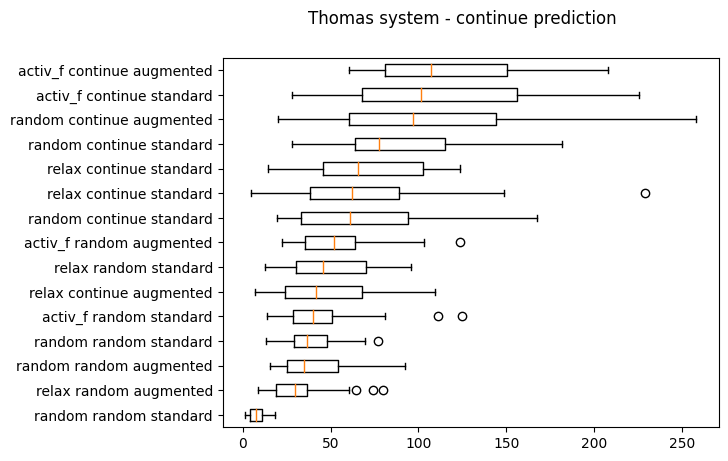

In [11]:
boxplots(results_split['thomas'], 'continue')
plt.suptitle('Thomas system - continue prediction')
plt.show()

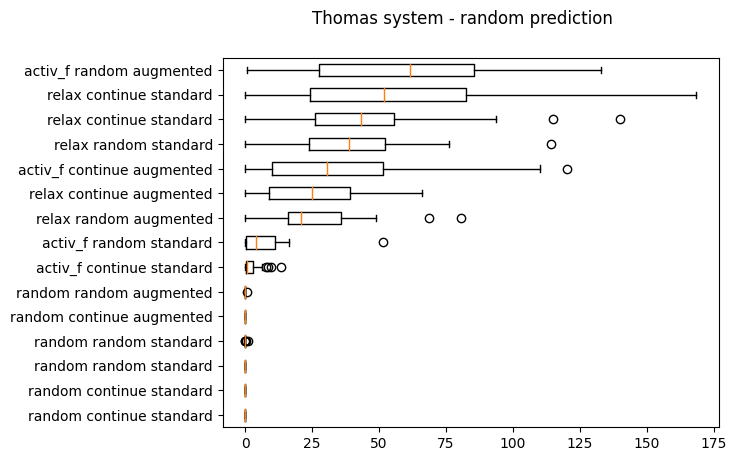

In [12]:
boxplots(results_split['thomas'], 'random')
plt.suptitle('Thomas system - random prediction')
plt.show()

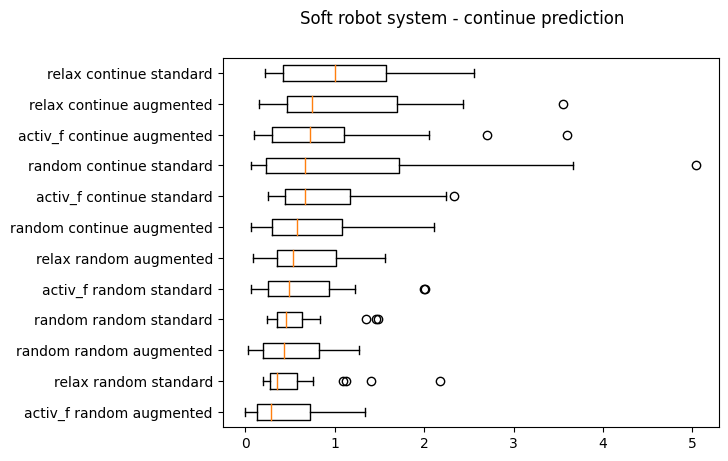

In [13]:
boxplots(results_split['softrobot'], 'continue')
plt.suptitle('Soft robot system - continue prediction')
plt.show()

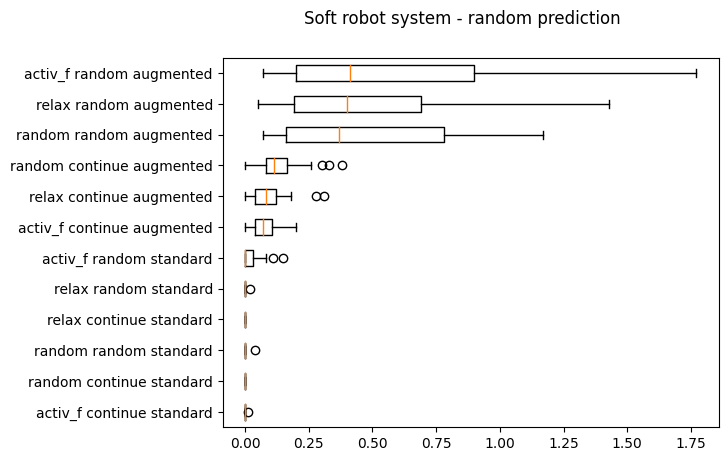

In [14]:
boxplots(results_split['softrobot'], 'random')
plt.suptitle('Soft robot system - random prediction')
plt.show()